In [1]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 📂DATA : 2 Classes

In [2]:
fold = 3

In [3]:
path = "/home/kannika/code/Rheology2023/Rheology_Blood/DataBlood_Viscosity_TrainML_3Fold_EMclass.csv"
data_feature = pd.read_csv(path)
print(data_feature.shape)
print("-"*100)
print(f"All Fold : {set(data_feature.fold)}")
## Split Train data Set
feature_train = data_feature[data_feature["fold"]!=fold].reset_index(drop=True)
print(f"Train Set : Fold ==> {set(feature_train.fold)}")
print("Train = ", feature_train.shape)
## Split Valid data Set
feature_valid = data_feature[data_feature["fold"]==fold].reset_index(drop=True)
print(f"Valiadtion Set : Fold ==> {set(feature_valid.fold)}")
print("Validation = ", feature_valid.shape)
## Print DataFrame
feature_valid.head()

(33, 11)
----------------------------------------------------------------------------------------------------
All Fold : {1, 2, 3}
Train Set : Fold ==> {1, 2}
Train =  (22, 11)
Valiadtion Set : Fold ==> {3}
Validation =  (11, 11)


,Unnamed: 0,Unnamed: 0.1,Code,classes,subclass,classes_binary,MCV,MCH,Hb,typeBEvsBM,fold
0,16,18,HN20,HN,No_Splenectomy,1.0,69.5,20.5,6.1,E,3
1,17,31,HN27,HN,Splenectomy,1.0,77.1,24.1,7.8,E,3
2,18,36,HN31,HN,No_Splenectomy,1.0,67.7,21.3,6.0,E,3
3,19,1,HN38,HN,No_Splenectomy,1.0,72.9,22.6,8.0,E,3
4,20,48,HN23,HN,Splenectomy,1.0,85.9,27.0,5.0,E,3


In [4]:
X_test = feature_valid[['MCV','MCH','Hb']]
y_test = feature_valid["typeBEvsBM"]
print(X_test.shape)
print(y_test.shape)
print(y_test[0])

(11, 3)
(11,)
E


In [5]:
print(len(set(y_test)))
print(set(y_test))

print("Counts of label 'BE': {}".format(sum(y_test=='E')))
print("Counts of label 'BM': {} \n".format(sum(y_test=='M')))

2
{'E', 'M'}
Counts of label 'BE': 8
Counts of label 'BM': 3 



## 🚀Load Model

In [6]:
nameclass = "typeBEvsBM_SmoteClasses"

In [7]:
#load model
import pickle

model_path = f"/media/tohn/HDD/rheology2023/ML_Model/Blood_Viscosity/{nameclass}/fold{fold}/Logis_Model_{nameclass}_fold{fold}.pkl"
print(f"[INFO]: Load Model from: {model_path}")
with open(model_path, 'rb') as file:
    model = pickle.load(file)

[INFO]: Load Model from: /media/tohn/HDD/rheology2023/ML_Model/Blood_Viscosity/typeBEvsBM_SmoteClasses/fold3/Logis_Model_typeBEvsBM_SmoteClasses_fold3.pkl


In [8]:
import numpy as np

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
print(len(y_pred))
print(y_pred)

prob_list = list()
for i in range(0,len(y_prob)):
    result = y_prob[i]
    maxx = np.argmax(result)
    prob_i = result[maxx]
    prob_list.append(prob_i)
print(len(prob_list))

11
['E' 'M' 'E' 'M' 'M' 'M' 'E' 'M' 'E' 'E' 'E']
11


In [9]:
print(prob_list)

[0.6925188277497454, 0.6576451502801308, 0.8269840715411909, 0.5753330439835163, 0.5379987262176342, 0.7960801914446448, 0.6207974155563615, 0.6613006867782205, 0.9734979119670576, 0.6992371534978703, 0.8320826230612124]


In [10]:
feature_valid['Category'] = y_pred
feature_valid['Prob'] = prob_list
feature_valid.head()

,Unnamed: 0,Unnamed: 0.1,Code,classes,subclass,classes_binary,MCV,MCH,Hb,typeBEvsBM,fold,Category,Prob
0,16,18,HN20,HN,No_Splenectomy,1.0,69.5,20.5,6.1,E,3,E,0.692519
1,17,31,HN27,HN,Splenectomy,1.0,77.1,24.1,7.8,E,3,M,0.657645
2,18,36,HN31,HN,No_Splenectomy,1.0,67.7,21.3,6.0,E,3,E,0.826984
3,19,1,HN38,HN,No_Splenectomy,1.0,72.9,22.6,8.0,E,3,M,0.575333
4,20,48,HN23,HN,Splenectomy,1.0,85.9,27.0,5.0,E,3,M,0.537999


In [11]:
act = feature_valid['typeBEvsBM'].tolist()
pred = feature_valid['Category'].tolist()
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
cmat = confusion_matrix(act, pred)
print('Classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))
print("="*100)
print(classification_report(act, pred))#performance

Classifier accuracy = 27.272727272727273%
              precision    recall  f1-score   support

           E       0.50      0.38      0.43         8
           M       0.00      0.00      0.00         3

    accuracy                           0.27        11
   macro avg       0.25      0.19      0.21        11
weighted avg       0.36      0.27      0.31        11



In [12]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# 🔷True Positive = BM

In [13]:
accuracy = accuracy_score(act, pred)
precision = precision_score(act, pred, average='binary', pos_label='M')
recall = recall_score(act, pred, average='binary', pos_label='M')
f1score = f1_score(act, pred, average='binary', pos_label='M')
#print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Accuracy = 0.2727272727272727
Precision = 0.0
Recall = 0.0
F1 Score = 0.0


## Confusion matrix

Text(0.5, 21.5, 'Predicted label')

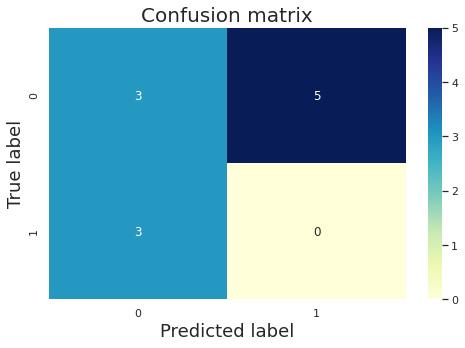

In [14]:
act_transformed = [1 if i == 'M' else 0 for i in act]
pred_transformed = [1 if i == 'M' else 0 for i in pred]

cm = confusion_matrix(act_transformed, pred_transformed)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [15]:
cm

array([[3, 5],
       [3, 0]])

In [16]:
tn, fp, fn, tp = confusion_matrix(act, pred).ravel()
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("True Positive (TP):", tp)

True Negative (TN): 3
False Positive (FP): 5
False Negative (FN): 3
True Positive (TP): 0


### 📌 Sensitivity = True Positive / (True Positive + False Negative)

In [17]:
Sensitivity = tp / (tp + fn)
print(f"Sensitivity : {Sensitivity}")

Sensitivity : 0.0


### 📌Specificity = True Negative / (True Negative + False Positive)

In [18]:
Specificity = tn / (tn + fp)
print(f"Specificity : {Specificity}")

Specificity : 0.375


# 🔷True Positive = BE

In [19]:
accuracy = accuracy_score(act, pred)
precision = precision_score(act, pred, average='binary', pos_label='E')
recall = recall_score(act, pred, average='binary', pos_label='E')
f1score = f1_score(act, pred, average='binary', pos_label='E')
#print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Accuracy = 0.2727272727272727
Precision = 0.5
Recall = 0.375
F1 Score = 0.42857142857142855


## Confusion matrix

Text(0.5, 21.5, 'Predicted label')

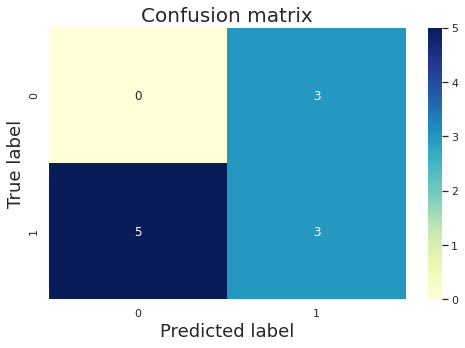

In [20]:
#create CF 
act_transformed = [1 if i == 'E' else 0 for i in act]
pred_transformed = [1 if i == 'E' else 0 for i in pred]

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#cmat = confusion_matrix(act, pred, labels=['M', 'E'])  #0, 1
cmat = confusion_matrix(act_transformed, pred_transformed) 

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

#ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax = sns.heatmap(cmat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [21]:
cmat

array([[0, 3],
       [5, 3]])

In [22]:
tn, fp, fn, tp = confusion_matrix(act_transformed, pred_transformed).ravel()
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

True Negative: 0
False Positive: 3
False Negative: 5
True Positive: 3


### 📌 Sensitivity = True Positive / (True Positive + False Negative)

In [23]:
Sensitivity = tp / (tp + fn)
print(f"Sensitivity : {Sensitivity}")

Sensitivity : 0.375


### 📌Specificity = True Negative / (True Negative + False Positive)

In [24]:
Specificity = tn / (tn + fp)
print(f"Specificity : {Specificity}")

Specificity : 0.0
